### Load Dataset and show

In [1]:
from automl.utils.data.data_loader import TSF_Data, download_data

data_path = download_data("공대7호관_HV_02")
print(data_path)

C:\Users\angel\.automl\dataset\공대7호관_HV_02.csv


In [2]:
import numpy as np

data = np.loadtxt(data_path, dtype=int)
data

C:\Users\angel\AppData\Local\Temp\ipykernel_17252\715159862.py:3: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  data = np.loadtxt(data_path, dtype=int)


array([163, 153, 148, ..., 139, 132, 132])

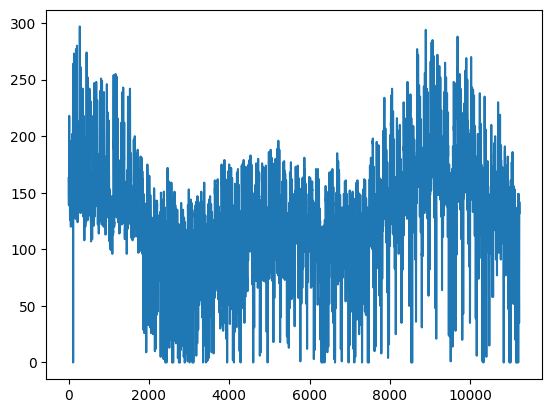

In [3]:
import matplotlib.pyplot as plt

plt.plot(data)

## Timeseries Forecasting without auto tuning

In [4]:
tsf = TSF_Data(data=data,
               input_width=168,
               output_width=24,
               train_ratio=0.9)

tsf.normalize_data()

In [5]:
from automl.tasks import TimeseriesForecasting

In [6]:
lstm_model = TimeseriesForecasting(model_name="LSTM-BASE",
                                  output_length=24,
                                  look_back=168,
                                  num_features=1,
                                  project_name="time_series_forecasting")

In [7]:
lstm_model.fit(x=tsf.data_train[0],
              y=tsf.data_train[1],
              validation_data=tsf.data_valid)

Epoch 1/100
100/100 [==============================] - 67s 417ms/step - loss: 0.0279 - mse: 0.0279 - mae: 0.1214 - val_loss: 0.0213 - val_mse: 0.0213 - val_mae: 0.1110 - lr: 0.0010
Epoch 2/100
100/100 [==============================] - 39s 385ms/step - loss: 0.0144 - mse: 0.0144 - mae: 0.0893 - val_loss: 0.0179 - val_mse: 0.0179 - val_mae: 0.0979 - lr: 0.0010
Epoch 3/100
100/100 [==============================] - 38s 383ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0697 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0789 - lr: 0.0010
Epoch 4/100
100/100 [==============================] - 38s 378ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0664 - val_loss: 0.0138 - val_mse: 0.0138 - val_mae: 0.0812 - lr: 0.0010
Epoch 5/100
100/100 [==============================] - 40s 400ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0670 - val_loss: 0.0134 - val_mse: 0.0134 - val_mae: 0.0777 - lr: 0.0010
Epoch 6/100
100/100 [==============================] - 39s 392ms/step - loss: 0.0086 - mse: 0.0

### Predict and export auto_model

In [ ]:
lstm_model.predict(x=tsf.data_test[0])

30/30 [==============================] - 0s 5ms/step


array([[0.42956924, 0.4435776 , 0.44097522, ..., 0.49618536, 0.468067  ,
        0.44763762],
       [0.43980706, 0.4461993 , 0.4589621 , ..., 0.5009018 , 0.48450834,
        0.47076225],
       [0.40340424, 0.4055926 , 0.40636867, ..., 0.4485853 , 0.44274908,
        0.4337566 ],
       ...,
       [0.42335898, 0.29829878, 0.3802152 , ..., 0.4170348 , 0.28208646,
        0.40993413],
       [0.57477117, 0.5082071 , 0.44131997, ..., 0.5067184 , 0.47744787,
        0.5671544 ],
       [0.48691124, 0.450311  , 0.49706098, ..., 0.5029023 , 0.56018955,
        0.5572363 ]], dtype=float32)

In [ ]:
best_model = lstm_model.export_model()